In [ ]:
#Digital Aid

In [ ]:
#ROC Curves

**Logistic Regression :**
Accuracy :  83.08%
Cross Validation Score :  86.54%
ROC_AUC Score :  23.91%



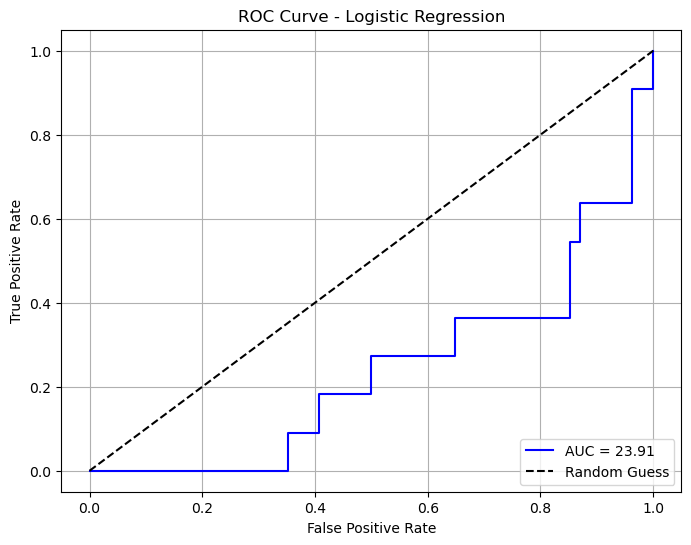

**Support Vector Machine :**
Accuracy :  83.08%
Cross Validation Score :  86.92%
ROC_AUC Score :  27.44%



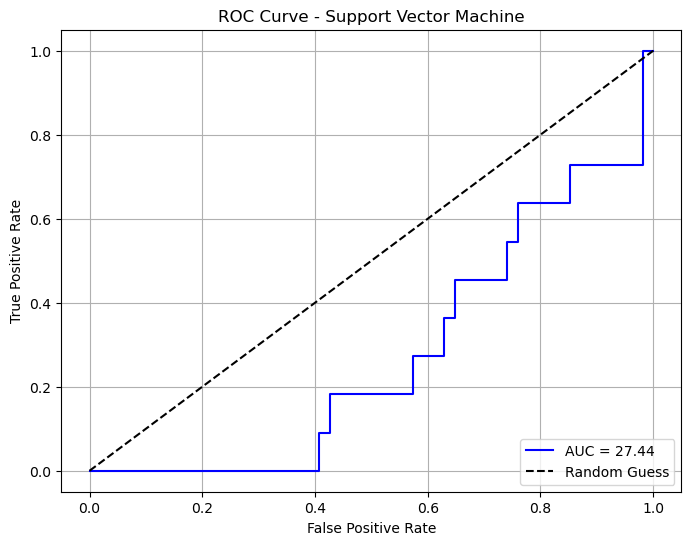

**Decision Tree Classifier :**
Accuracy :  76.92%
Cross Validation Score :  82.31%
ROC_AUC Score :  45.29%



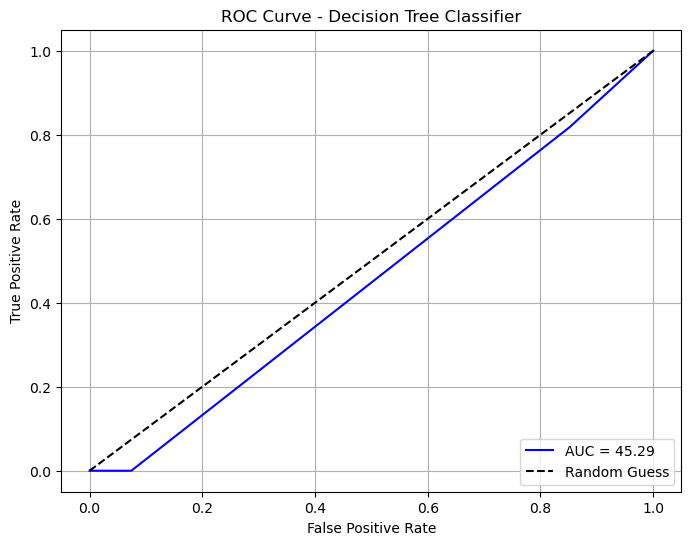

**Random Forest Classifier :**
Accuracy :  83.08%
Cross Validation Score :  86.54%
ROC_AUC Score :  38.38%



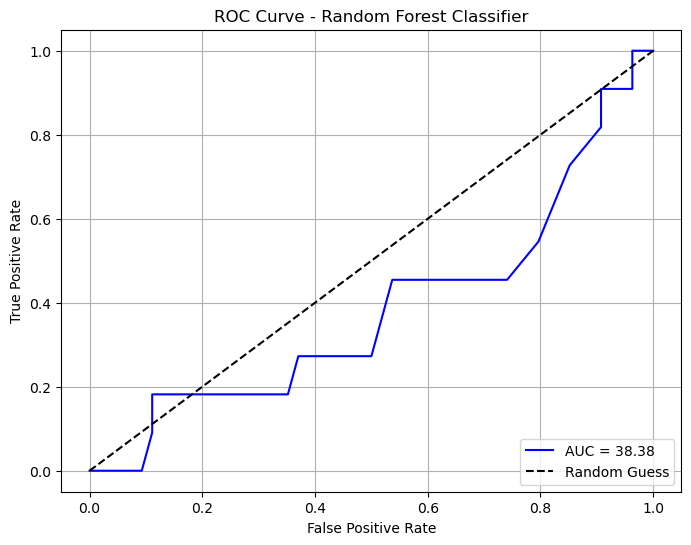

**K-Nearest Neighbors :**
Accuracy :  83.08%
Cross Validation Score :  85.38%
ROC_AUC Score :  48.91%



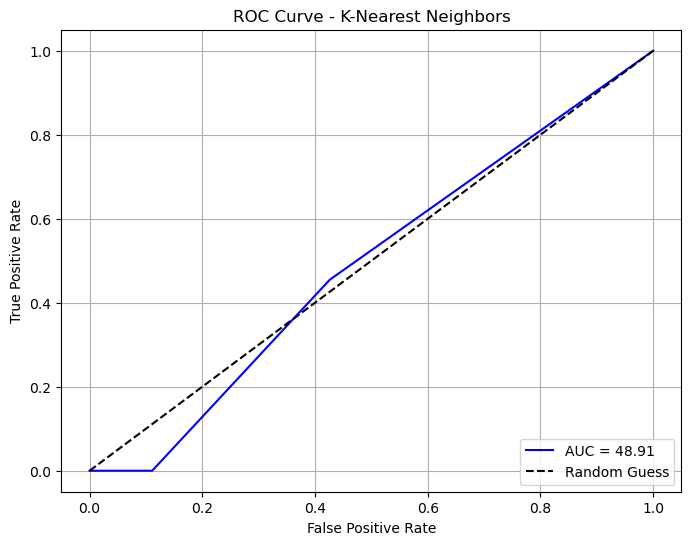

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
file_path = "cleaned_healthmonitoring.csv"  # Update if needed
df = pd.read_csv(file_path)

# Drop unnecessary columns
df = df.drop(columns=["PatientID", "Timestamp"])

# Encode categorical variables
categorical_cols = ["Gender", "BloodPressure", "ActivityLevel", "SleepQuality", "StressLevel", "Diabetes", "DietType"]
label_encoders = {col: LabelEncoder() for col in categorical_cols}

for col, encoder in label_encoders.items():
    df[col] = encoder.fit_transform(df[col])

# Define features and target
X = df.drop(columns=["Diabetes"])  # Features
y = df["Diabetes"]  # Target variable (0: No, 1: Yes)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models with parameters
models = {
    "Logistic Regression": LogisticRegression(random_state=0, C=10, penalty='l2'),
    "Support Vector Machine": SVC(probability=True, random_state=0, kernel='rbf'),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=0, max_depth=5),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=0),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

# Function to train and evaluate models
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Predict probabilities for ROC curve
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred) * 100
    cross_val = np.mean(cross_val_score(model, X_train, y_train, cv=5)) * 100
    roc_auc = roc_auc_score(y_test, y_proba) * 100

    # Print evaluation
    print(f"**{name} :**")
    print(f"Accuracy :  {accuracy:.2f}%")
    print(f"Cross Validation Score :  {cross_val:.2f}%")
    print(f"ROC_AUC Score :  {roc_auc:.2f}%\n")

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {name}")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# Train and evaluate each model
for name, model in models.items():
    evaluate_model(model, name)

**Logistic Regression :**
Accuracy :  83.08%
Cross Validation Score :  86.54%
ROC_AUC Score :  23.91%


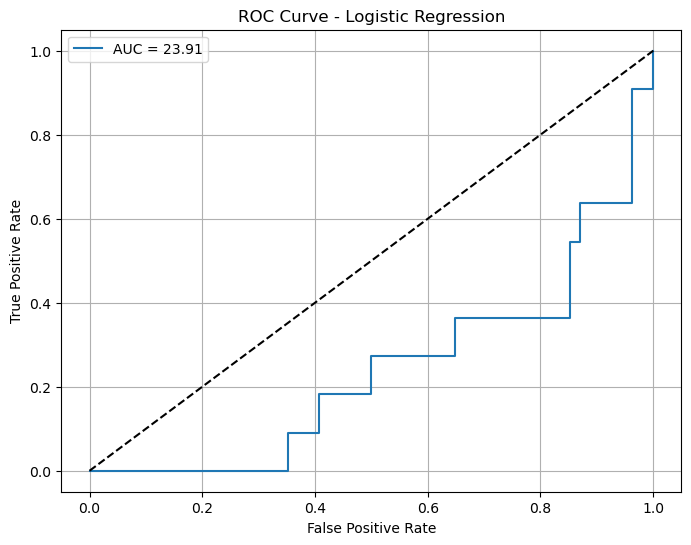

In [5]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0, C=10, penalty='l2')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred) * 100
cross_val = np.mean(cross_val_score(model, X_train, y_train, cv=5)) * 100
roc_auc = roc_auc_score(y_test, y_proba) * 100

print("**Logistic Regression :**")
print(f"Accuracy :  {accuracy:.2f}%")
print(f"Cross Validation Score :  {cross_val:.2f}%")
print(f"ROC_AUC Score :  {roc_auc:.2f}%")

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

**Support Vector Machine :**
Accuracy :  83.08%
Cross Validation Score :  86.92%
ROC_AUC Score :  27.44%


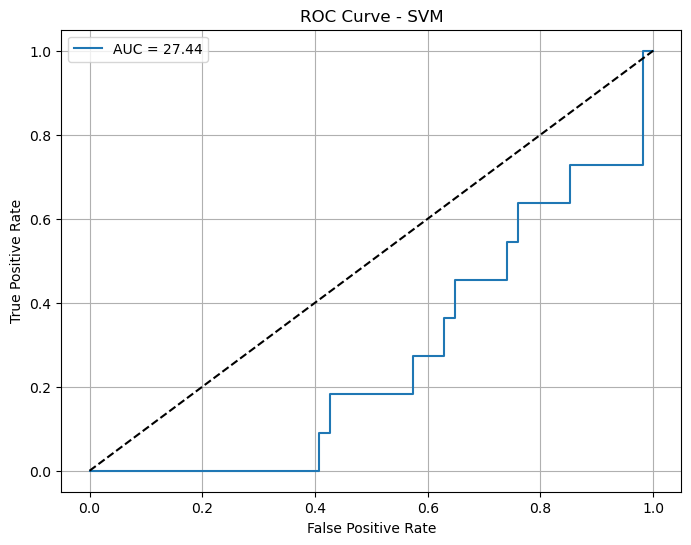

In [7]:
from sklearn.svm import SVC

model = SVC(probability=True, random_state=0, kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred) * 100
cross_val = np.mean(cross_val_score(model, X_train, y_train, cv=5)) * 100
roc_auc = roc_auc_score(y_test, y_proba) * 100

print("**Support Vector Machine :**")
print(f"Accuracy :  {accuracy:.2f}%")
print(f"Cross Validation Score :  {cross_val:.2f}%")
print(f"ROC_AUC Score :  {roc_auc:.2f}%")

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - SVM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

**Decision Tree Classifier :**
Accuracy :  76.92%
Cross Validation Score :  82.31%
ROC_AUC Score :  45.29%


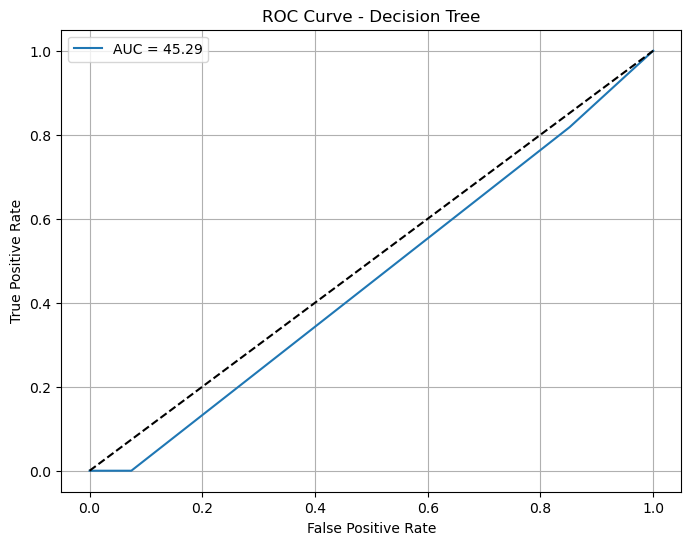

In [9]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0, max_depth=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred) * 100
cross_val = np.mean(cross_val_score(model, X_train, y_train, cv=5)) * 100
roc_auc = roc_auc_score(y_test, y_proba) * 100

print("**Decision Tree Classifier :**")
print(f"Accuracy :  {accuracy:.2f}%")
print(f"Cross Validation Score :  {cross_val:.2f}%")
print(f"ROC_AUC Score :  {roc_auc:.2f}%")

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

**Random Forest Classifier :**
Accuracy :  83.08%
Cross Validation Score :  86.54%
ROC_AUC Score :  38.38%


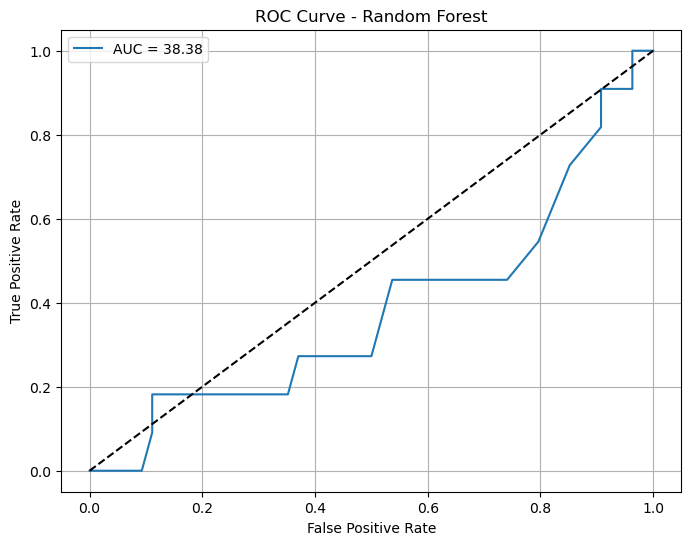

In [10]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred) * 100
cross_val = np.mean(cross_val_score(model, X_train, y_train, cv=5)) * 100
roc_auc = roc_auc_score(y_test, y_proba) * 100

print("**Random Forest Classifier :**")
print(f"Accuracy :  {accuracy:.2f}%")
print(f"Cross Validation Score :  {cross_val:.2f}%")
print(f"ROC_AUC Score :  {roc_auc:.2f}%")

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

**K-Nearest Neighbors :**
Accuracy :  83.08%
Cross Validation Score :  85.38%
ROC_AUC Score :  48.91%


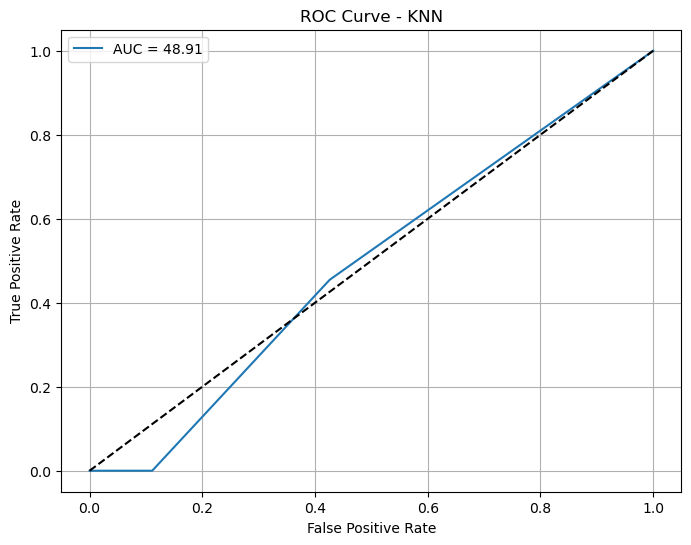

In [11]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred) * 100
cross_val = np.mean(cross_val_score(model, X_train, y_train, cv=5)) * 100
roc_auc = roc_auc_score(y_test, y_proba) * 100

print("**K-Nearest Neighbors :**")
print(f"Accuracy :  {accuracy:.2f}%")
print(f"Cross Validation Score :  {cross_val:.2f}%")
print(f"ROC_AUC Score :  {roc_auc:.2f}%")

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - KNN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()